In this study, we will study a mushroom dataset. In addition to building a classification model using Adaboost and gradient boost, we will also do exploratory data analysis and find specific features that give the greatest prediction to whether a mushroom is poisonous or not.

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [37]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no missing data

<AxesSubplot:xlabel='class', ylabel='count'>

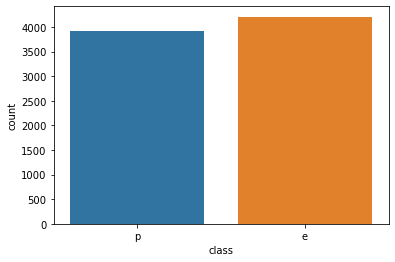

In [19]:
sns.countplot(data=df, x='class')

This is quite a balanced dataset

In [20]:
df.describe().transpose().sort_values('unique')

,count,unique,top,freq
veil-type,8124,1,p,8124
class,8124,2,e,4208
bruises,8124,2,f,4748
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
stalk-shape,8124,2,t,4608
ring-number,8124,3,o,7488
cap-surface,8124,4,y,3244
veil-color,8124,4,w,7924


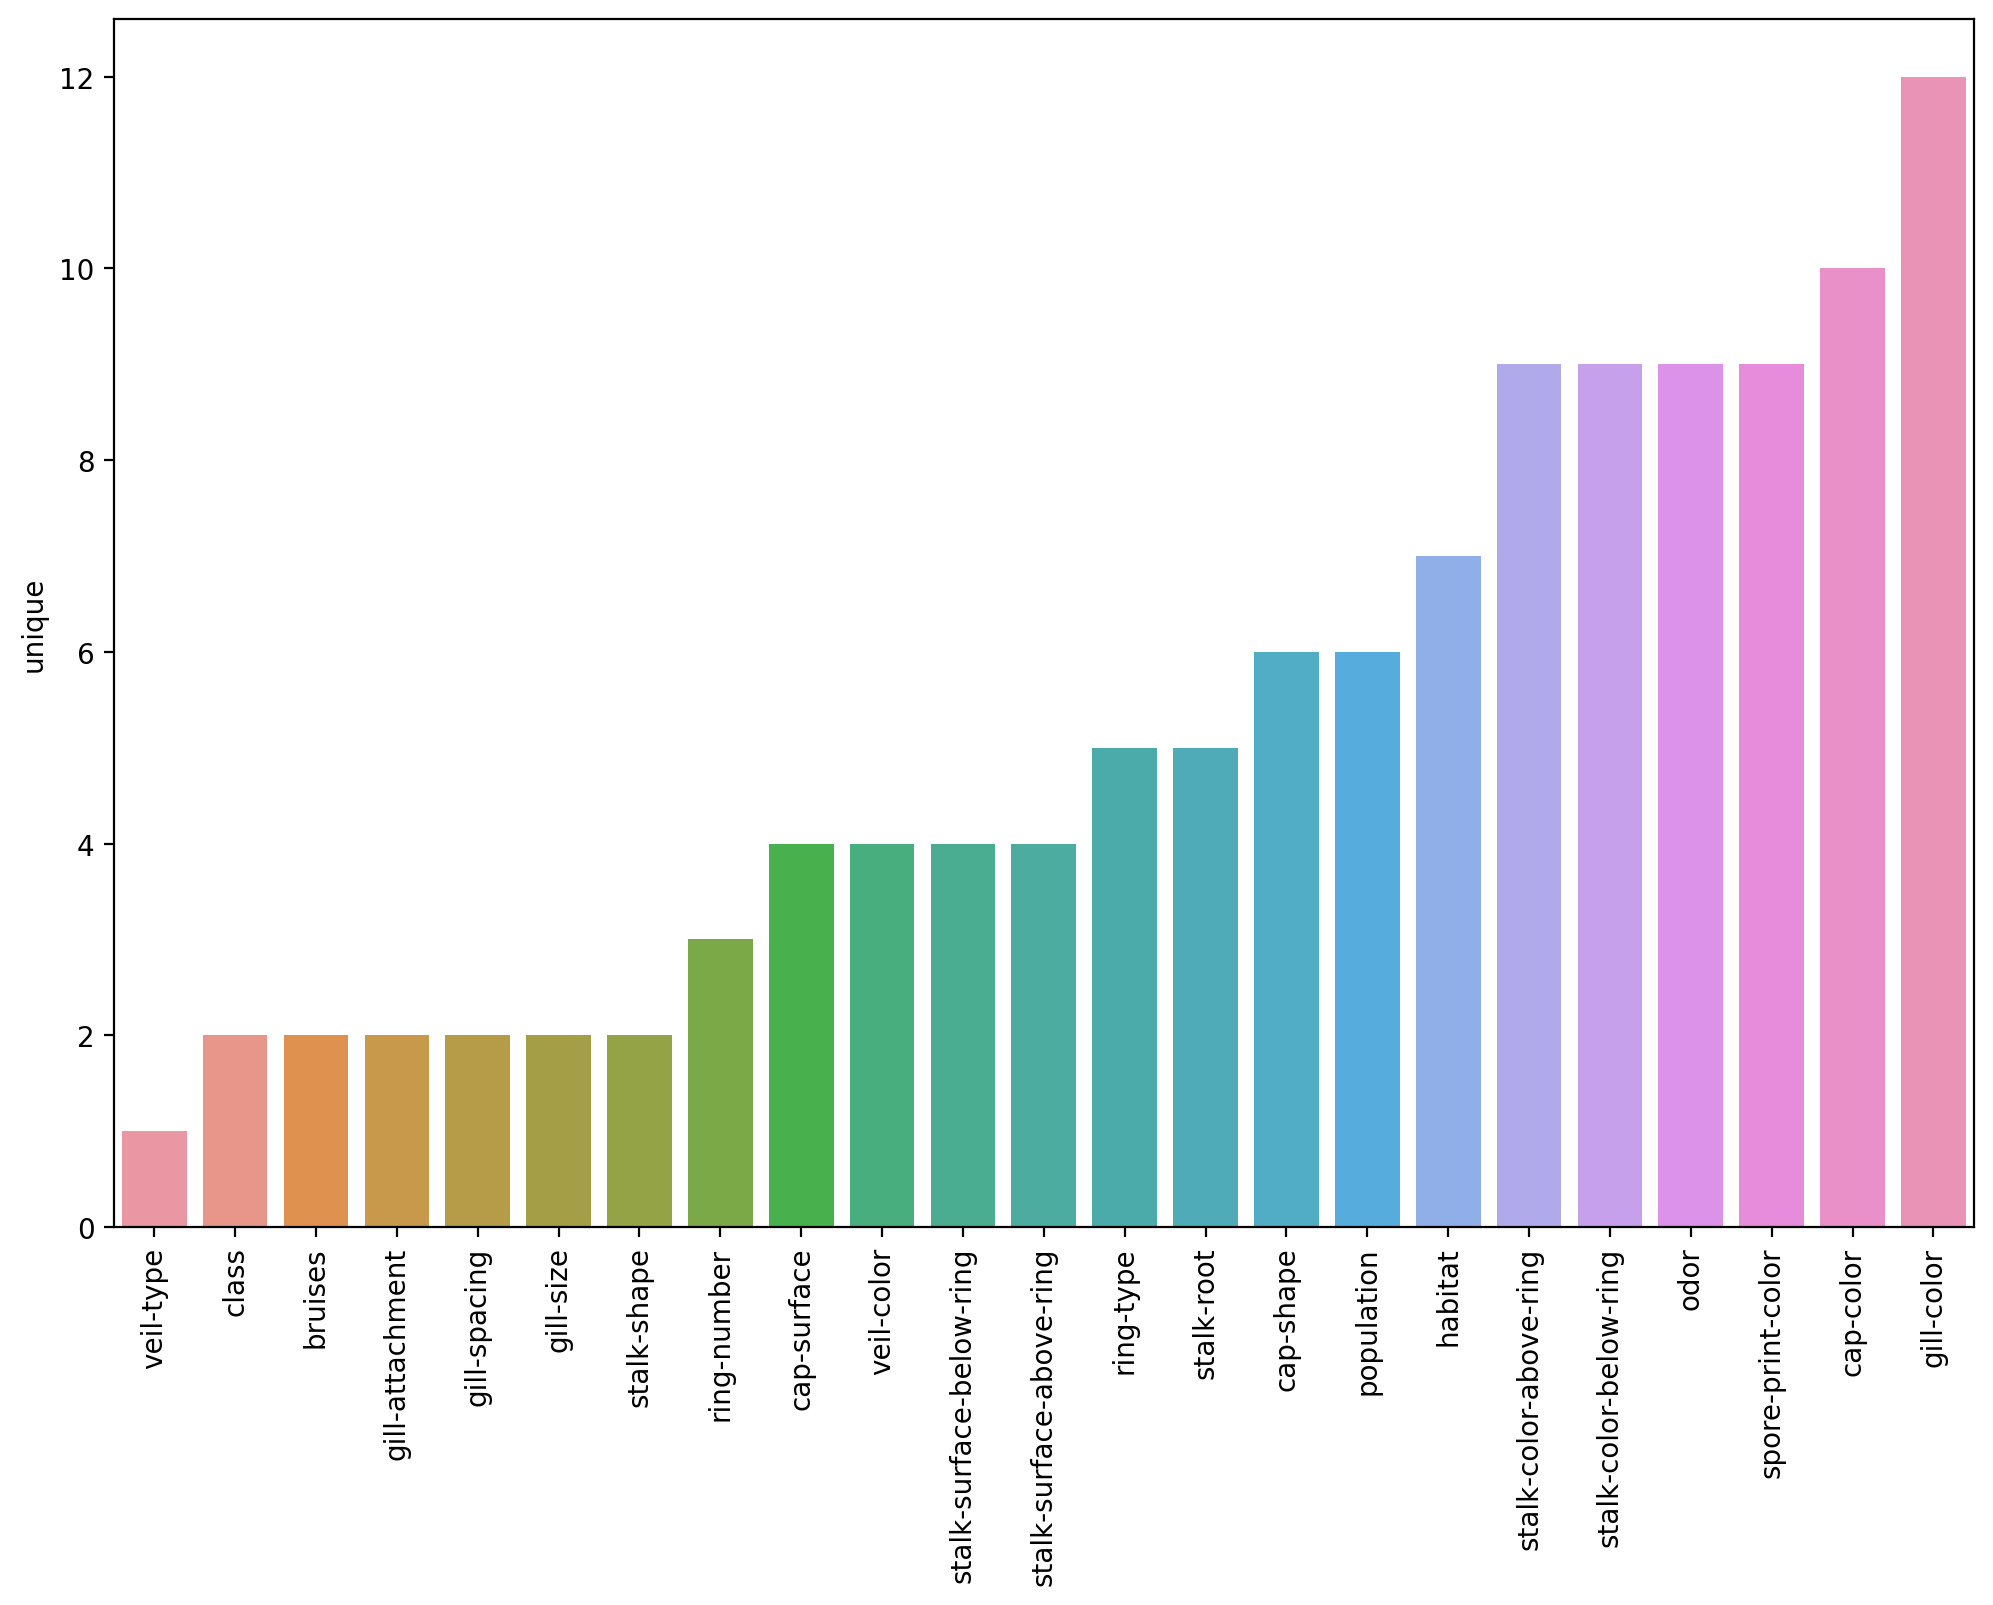

In [26]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=df.describe().transpose().sort_values('unique'), x=df.describe().transpose().sort_values('unique').index, y='unique')
plt.xticks(rotation=90);

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop('class', axis=1)
y=df['class']

In [32]:
X = pd.get_dummies(X, drop_first=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [34]:
X_train.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6923,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
7565,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
163,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
6318,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
7150,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0


In [38]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [39]:
ada_model = AdaBoostClassifier(n_estimators=1)

With just a single estimator, we are using only a single stump for training. This will allow AdaBoost to find the most important feature to split the data on.

In [40]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [41]:
preds = ada_model.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

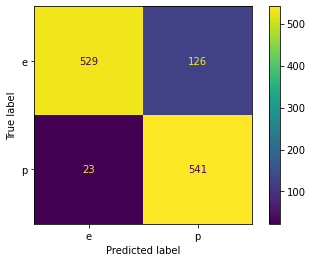

In [43]:
plot_confusion_matrix(ada_model, X_test, y_test)

In [44]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



This is pretty impressive results for splitting on just a single feature. let's see what is it

In [45]:
ada_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
feat_imp = pd.DataFrame(data=ada_model.feature_importances_, index=X.columns, columns=['importance'])

In [58]:
feat_imp.sort_values('importance', ascending=False)

,importance
odor_n,1.0
cap-shape_c,0.0
ring-number_t,0.0
veil-color_y,0.0
veil-color_w,0.0
...,...
gill-color_g,0.0
gill-color_e,0.0
gill-size_n,0.0
gill-spacing_w,0.0


<AxesSubplot:xlabel='odor', ylabel='count'>

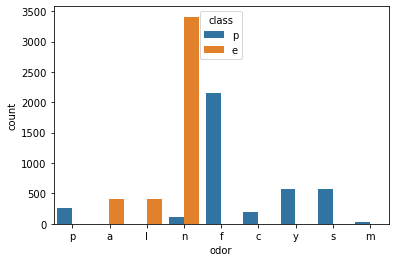

In [60]:
sns.countplot(data=df, x='odor', hue='class')

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

This is incredible. Looking at odor = n, where there are no odors, there is a very high likelihood that the mushroom is edible. If there is a public service warning for people picking mushroom, one of the factors could be that people need to check if the there are any odors that the mushroom is giving out.

In [62]:
len(X.columns)

95

In [63]:
err = []

for k in range(1, 96):
    ada_model = AdaBoostClassifier(n_estimators=k)
    ada_model.fit(X_train, y_train)
    
    preds = ada_model.predict(X_test)
    err_ = 1 - accuracy_score(y_test, preds)
    
    err.append(err_)

In [68]:
err_plot = pd.DataFrame(data=err, index=range(1,96), columns=['error'])

In [69]:
err_plot

,error
1,0.122231
2,0.122231
3,0.095160
4,0.045939
5,0.031173
...,...
91,0.000000
92,0.000000
93,0.000000
94,0.000000


Text(0, 0.5, 'error')

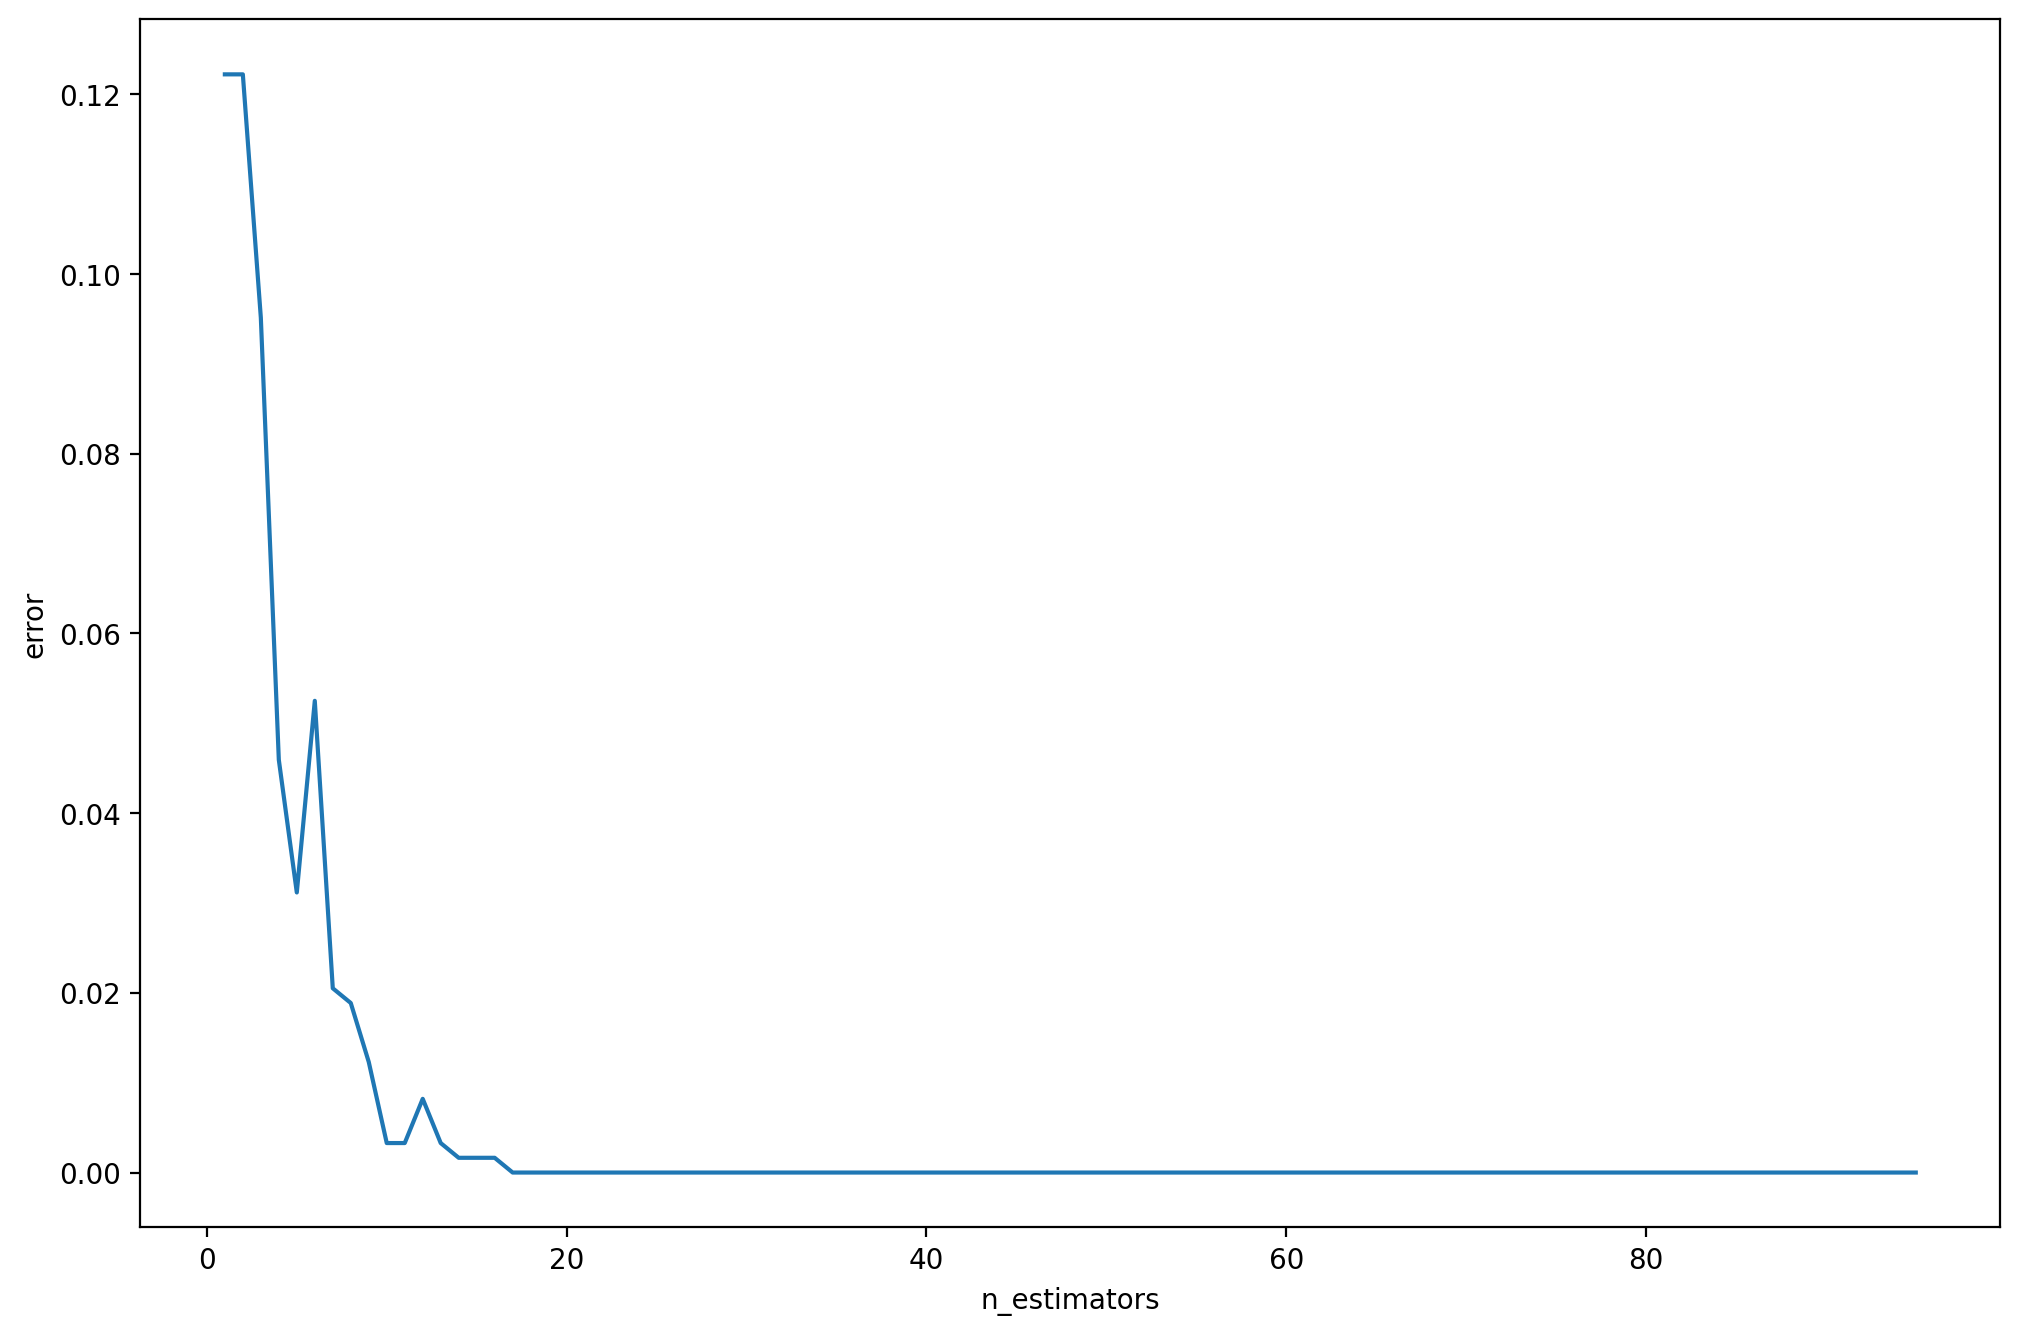

In [77]:
plt.figure(figsize=(12,8), dpi=200)
plt.plot(range(1,96), err_plot['error'])
plt.xlabel('n_estimators')
plt.ylabel('error')

It looks like 20 trees may be a good pick

In [78]:
ada_model = AdaBoostClassifier(n_estimators=20)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20)

In [82]:
ada_model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.  ,
       0.1 , 0.05, 0.  , 0.  , 0.  , 0.05, 0.15, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.05, 0.  , 0.1 , 0.  , 0.05, 0.  , 0.  , 0.1 ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [84]:
feat_imp = pd.DataFrame(data=ada_model.feature_importances_, index=X.columns, columns=['importance'])

In [97]:
feat = feat_imp[feat_imp['importance'] > 0.001].sort_values('importance')

In [98]:
feat

,importance
cap-color_w,0.05
bruises_t,0.05
odor_c,0.05
odor_f,0.05
odor_p,0.05
gill-spacing_w,0.05
stalk-surface-above-ring_k,0.05
stalk-surface-below-ring_y,0.05
stalk-color-below-ring_n,0.05
spore-print-color_r,0.05


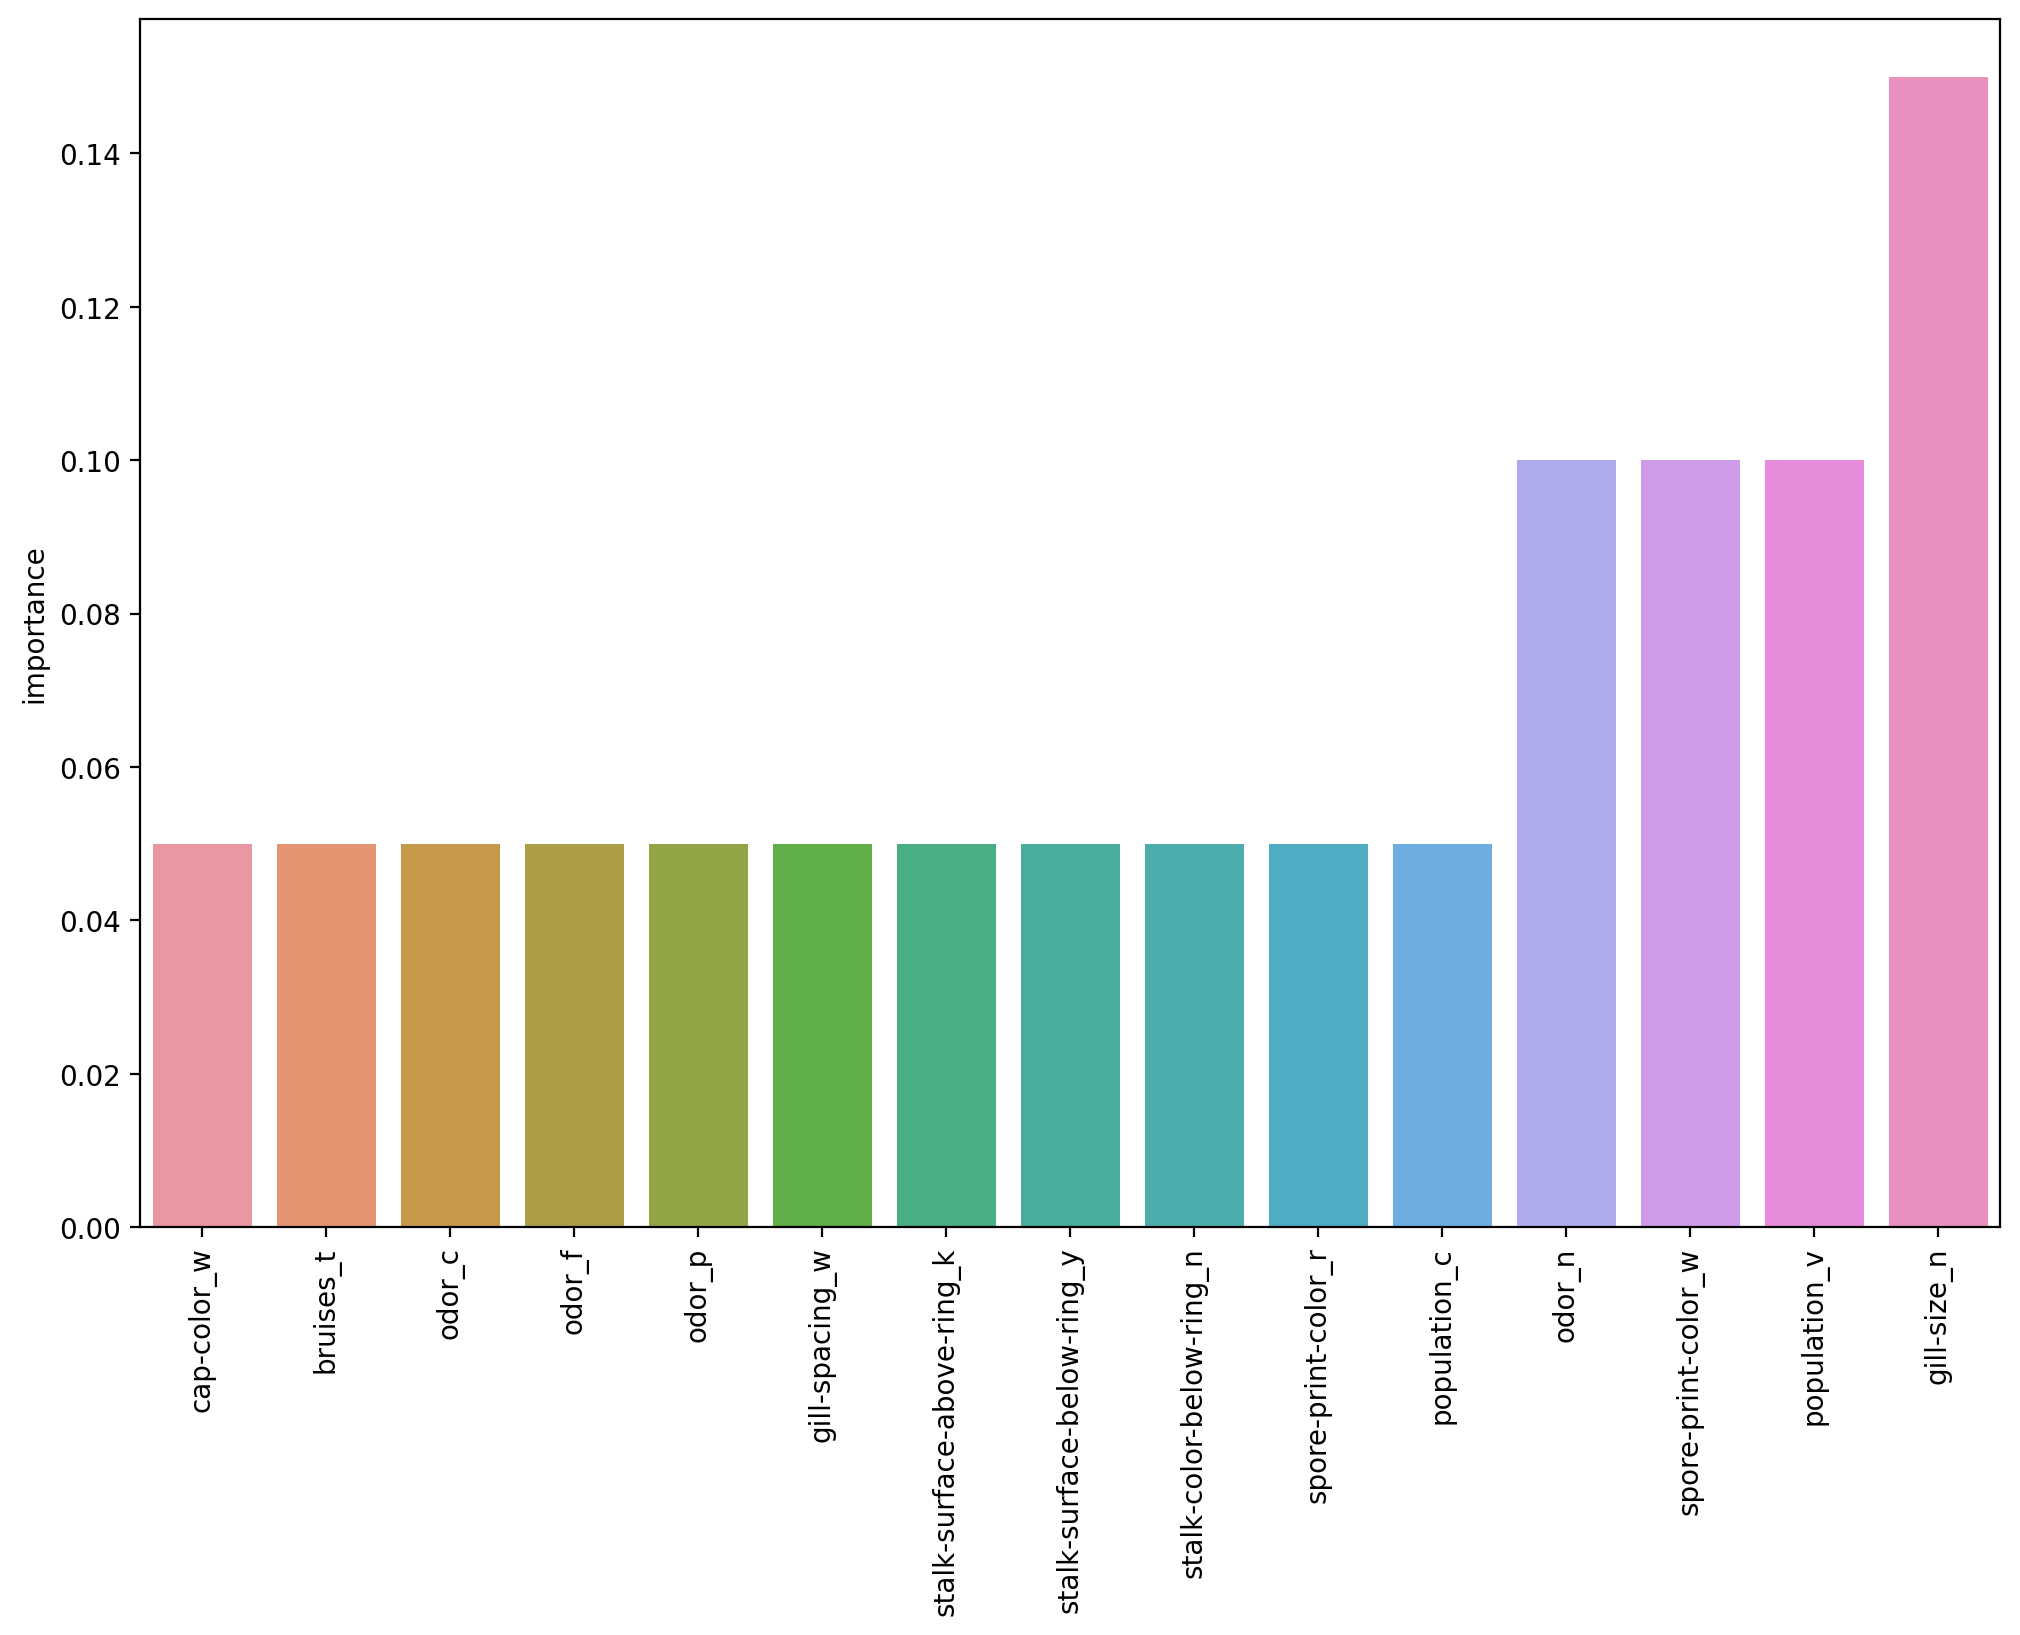

In [99]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=feat, x=feat.index, y='importance')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='gill-size', ylabel='count'>

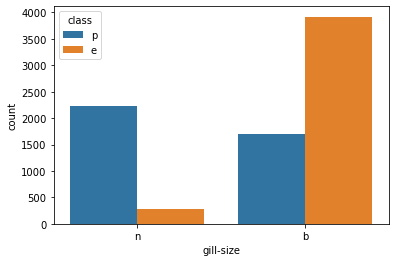

In [100]:
sns.countplot(data=df, x='gill-size', hue='class')

Let's try gradient boosting algorithm and see what we get

In [101]:
gradient_model = GradientBoostingClassifier()

In [102]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid = {'n_estimators': [1, 10, 50, 75, 100, 200],
             'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
             'max_depth': [3,4,5]}

In [107]:
grid = GridSearchCV(gradient_model, param_grid)

In [108]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [1, 10, 50, 75, 100, 200]})

In [109]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=4, n_estimators=75)

In [110]:
preds = grid.predict(X_test)

In [111]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [112]:
grid.best_estimator_.feature_importances_

array([6.07710784e-04, 1.18162728e-17, 1.19677303e-24, 3.44690668e-12,
       5.88216716e-20, 1.58204598e-03, 3.59959915e-17, 1.94105779e-04,
       5.27966096e-08, 2.11059473e-22, 3.61738241e-09, 2.27353730e-12,
       3.38379223e-18, 9.45674840e-30, 0.00000000e+00, 1.07541139e-06,
       7.00527403e-06, 5.66285457e-02, 1.36135125e-06, 1.72221203e-03,
       8.24791591e-04, 1.16876101e-02, 6.23226923e-01, 9.73871820e-03,
       0.00000000e+00, 0.00000000e+00, 8.80070551e-11, 1.04488420e-03,
       7.37497304e-05, 0.00000000e+00, 5.80606471e-22, 1.52220021e-29,
       1.58230492e-22, 1.45322440e-22, 0.00000000e+00, 1.75744701e-28,
       4.23923204e-30, 1.12280952e-26, 4.30401276e-07, 4.01174790e-35,
       2.08004893e-04, 2.43357661e-06, 1.26065623e-01, 2.13116478e-02,
       5.72611874e-02, 7.93872772e-06, 5.01210362e-08, 2.88655242e-09,
       9.43832423e-12, 2.71493726e-09, 1.49534570e-02, 1.17365148e-13,
       0.00000000e+00, 0.00000000e+00, 1.56111978e-04, 0.00000000e+00,
      

In [114]:
feat_imp = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])

In [118]:
feat_imp[feat_imp['importance'] > 0.001].sort_values('importance')

,importance
gill-spacing_w,0.001045
cap-surface_g,0.001582
odor_f,0.001722
ring-number_o,0.005584
odor_p,0.009739
odor_m,0.011688
stalk-surface-below-ring_y,0.014953
spore-print-color_u,0.017267
spore-print-color_h,0.019326
stalk-root_e,0.021312


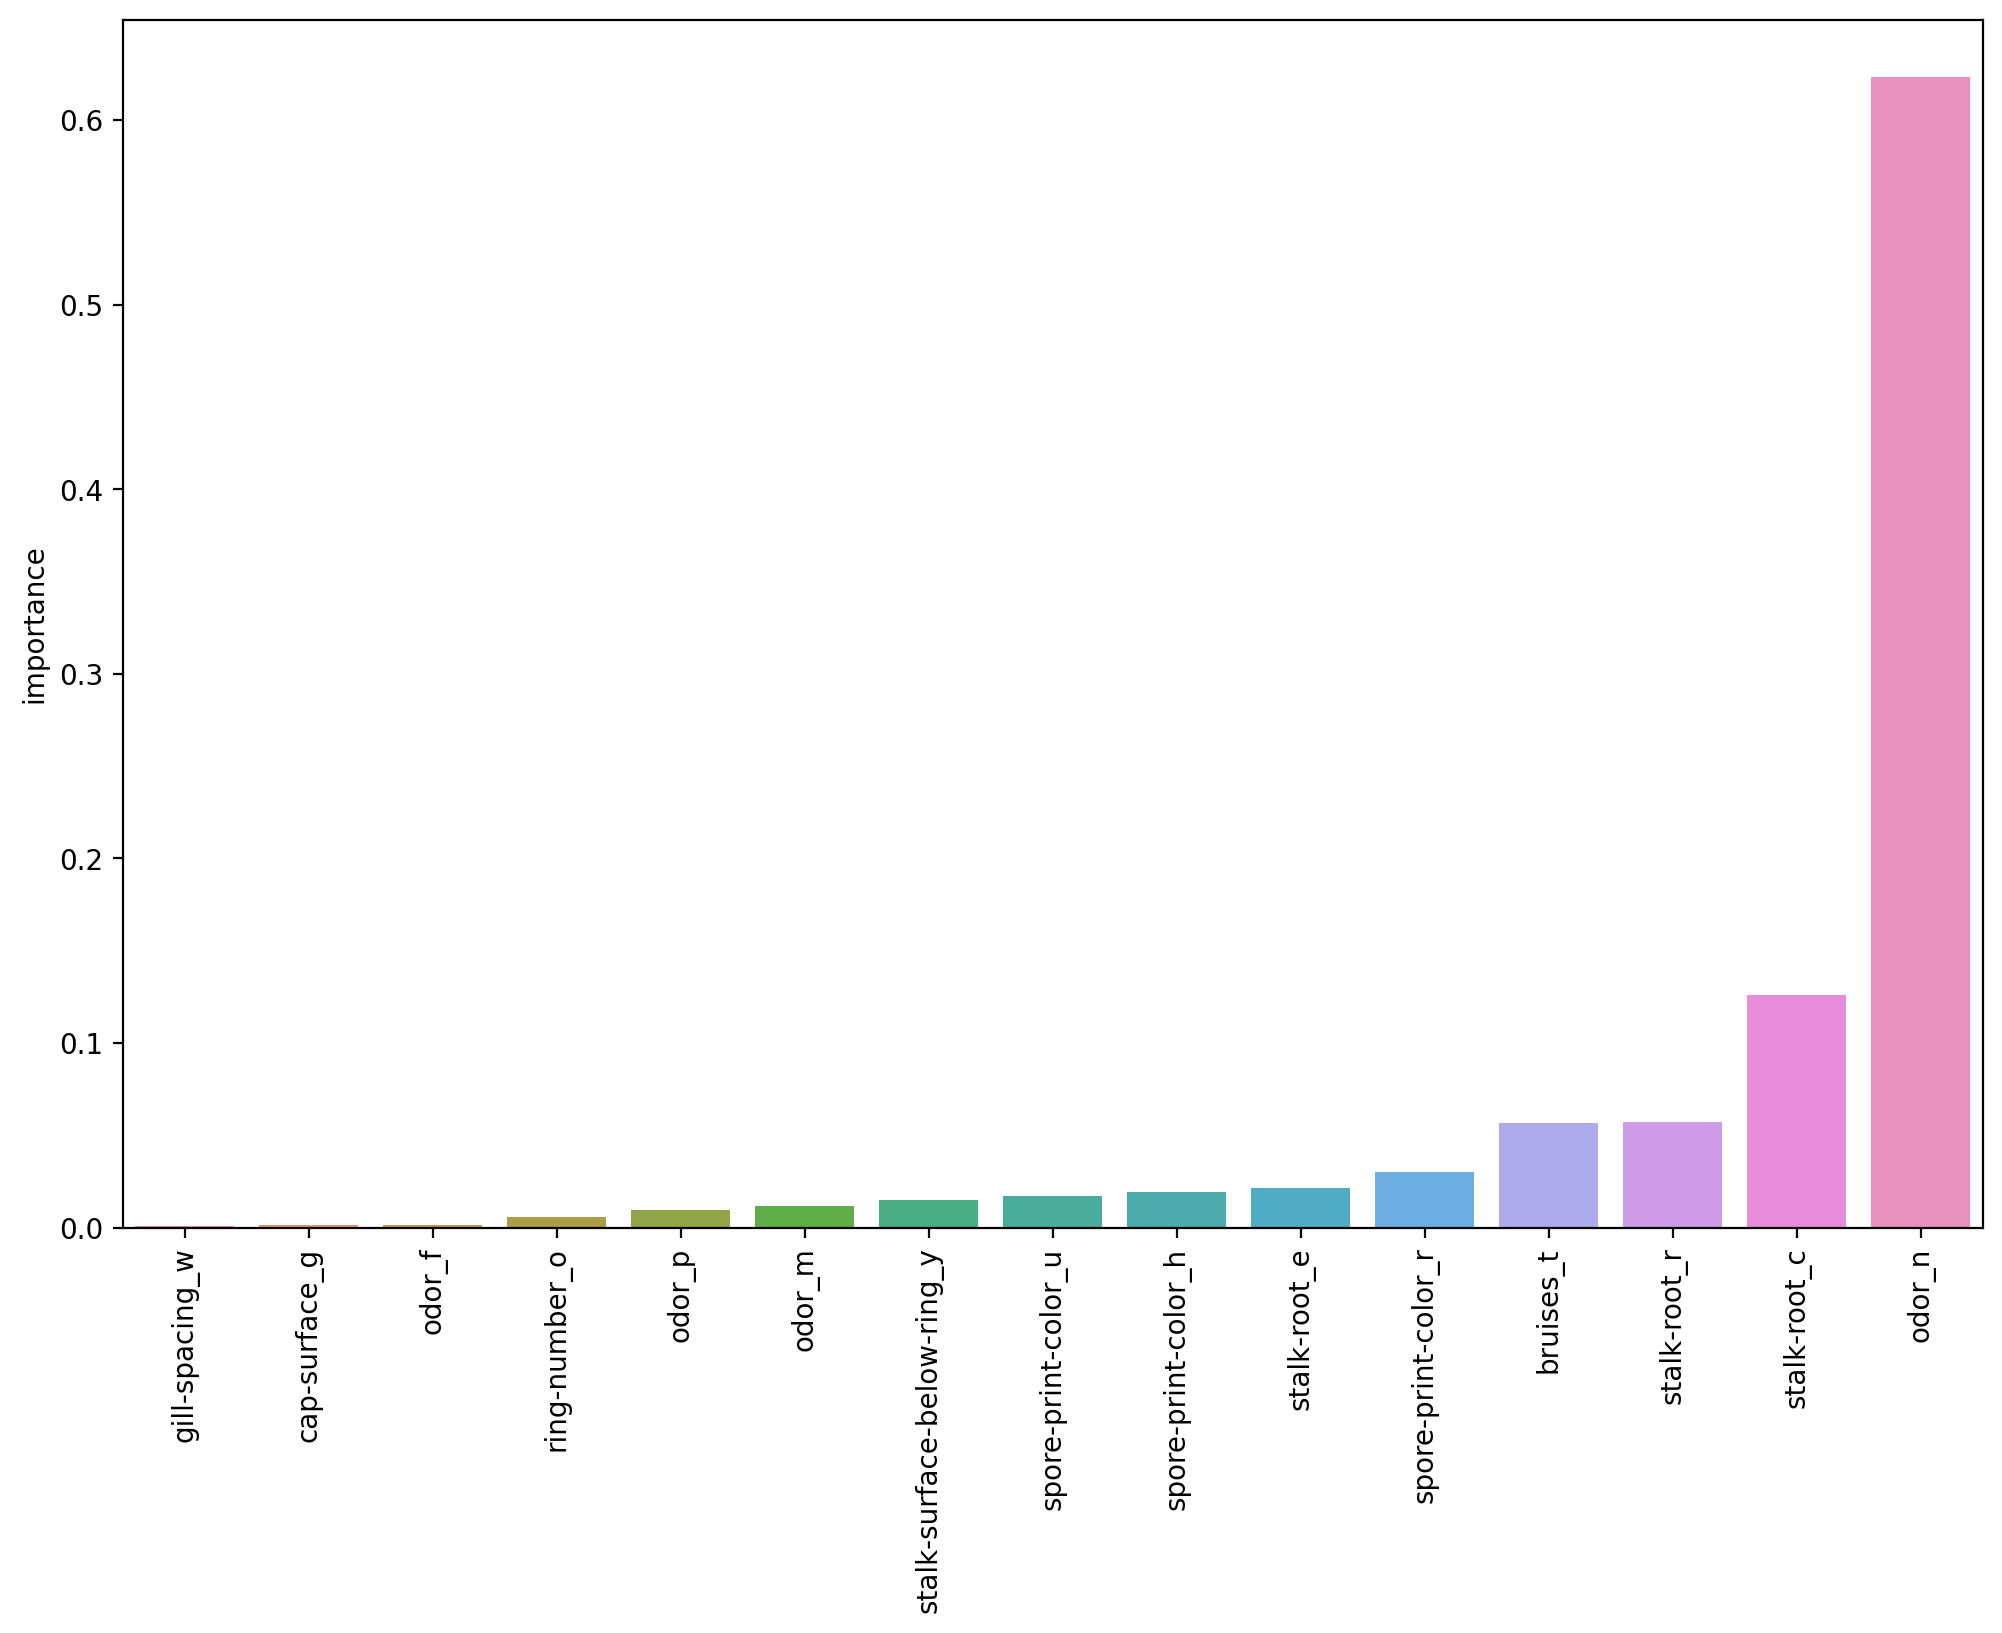

In [122]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=feat_imp[feat_imp['importance'] > 0.001].sort_values('importance'), x=feat_imp[feat_imp['importance'] > 0.001].sort_values('importance').index, y='importance')
plt.xticks(rotation=90);

It is interesting that with gradient boost it tells us that the most important feature is also odor_n